# Bài 1:

## Ví dụ về các mô hình có sử dụng tokenizer theo BPE.

### 1. GPT-2

In [ ]:
from transformers import GPT2Tokenizer

# Load pre-trained GPT tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

# Define input text
input_text = "The sun was shining brightly in the clear blue sky. A gentle breeze rustled through the trees, carrying the sweet scent of flowers."

# Tokenize input text using BPE tokens
tokens = tokenizer.tokenize(input_text)

# Print tokens
print(tokens)

['The', 'Ġsun', 'Ġwas', 'Ġshining', 'Ġbrightly', 'Ġin', 'Ġthe', 'Ġclear', 'Ġblue', 'Ġsky', '.', 'ĠA', 'Ġgentle', 'Ġbreeze', 'Ġrust', 'led', 'Ġthrough', 'Ġthe', 'Ġtrees', ',', 'Ġcarrying', 'Ġthe', 'Ġsweet', 'Ġscent', 'Ġof', 'Ġflowers', '.']


### 2. BERT (Bidirectional Encoder Representations from Transformers)

In [ ]:
from transformers import BertTokenizer

# Load pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Define input text
input_text = "The sun was shining brightly in the clear blue sky. A gentle breeze rustled through the trees, carrying the sweet scent of flowers."

# Tokenize input text using BPE tokens
tokens = tokenizer.tokenize(input_text)

# Print tokens
print(tokens)

['the', 'sun', 'was', 'shining', 'brightly', 'in', 'the', 'clear', 'blue', 'sky', '.', 'a', 'gentle', 'breeze', 'rust', '##led', 'through', 'the', 'trees', ',', 'carrying', 'the', 'sweet', 'scent', 'of', 'flowers', '.']


### 3. RoBERTa

In [ ]:
from transformers import RobertaTokenizer

# Load pre-trained RoBERTa tokenizer
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# Define input text
input_text ="The sun was shining brightly in the clear blue sky. A gentle breeze rustled through the trees, carrying the sweet scent of flowers."

# Tokenize input text using BPE tokens
tokens = tokenizer.tokenize(input_text)

# Print tokens
print(tokens)

['The', 'Ġsun', 'Ġwas', 'Ġshining', 'Ġbrightly', 'Ġin', 'Ġthe', 'Ġclear', 'Ġblue', 'Ġsky', '.', 'ĠA', 'Ġgentle', 'Ġbreeze', 'Ġrust', 'led', 'Ġthrough', 'Ġthe', 'Ġtrees', ',', 'Ġcarrying', 'Ġthe', 'Ġsweet', 'Ġscent', 'Ġof', 'Ġflowers', '.']


### 4. DeBERTa

In [ ]:
from transformers import DebertaTokenizer

# Khởi tạo tokenizer của DeBERTa
tokenizer = DebertaTokenizer.from_pretrained("microsoft/deberta-base")

# Câu cần tokenization
sentence = "The sun was shining brightly in the clear blue sky. A gentle breeze rustled through the trees, carrying the sweet scent of flowers."

# Tokenization
tokens = tokenizer.tokenize(sentence)

# In ra các token
print(tokens)


['The', 'Ġsun', 'Ġwas', 'Ġshining', 'Ġbrightly', 'Ġin', 'Ġthe', 'Ġclear', 'Ġblue', 'Ġsky', '.', 'ĠA', 'Ġgentle', 'Ġbreeze', 'Ġrust', 'led', 'Ġthrough', 'Ġthe', 'Ġtrees', ',', 'Ġcarrying', 'Ġthe', 'Ġsweet', 'Ġscent', 'Ġof', 'Ġflowers', '.']


## So sánh 2 mô hình trên một bài toán cụ thể nào đó có sử dụng BPE và không sử dụng BPE.

In [80]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tokenizers import Tokenizer, models, pre_tokenizers, decoders, trainers
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import Callback

class AccuracyCallback(Callback):
    def __init__(self):
        super(AccuracyCallback, self).__init__()
        self.train_acc = []
        self.val_acc = []
        self.train_loss = []

    def on_epoch_end(self, epoch, logs=None):
        self.train_acc.append(logs['accuracy'])
        self.val_acc.append(logs['val_accuracy'])
        self.train_loss.append(logs['loss'])
# Đọc dữ liệu từ file CSV
data = pd.read_csv('train.csv')

# Loại bỏ các mẫu dữ liệu có giá trị null
data = data.dropna()

# Chuyển đổi cột "content" thành chuỗi (string)
data['content'] = data['content'].astype(str)

# Tách nội dung và nhãn
texts = data['content'].values
labels = data['label'].values

# Tạo tokenizer BPE
tokenizer = Tokenizer(models.BPE())
trainer = trainers.BpeTrainer(vocab_size=1000, min_frequency=2)
tokenizer.pre_tokenizer = pre_tokenizers.Whitespace()

tokenizer.train_from_iterator(texts, trainer=trainer)

# Áp dụng BPE tokenization
sequences = [tokenizer.encode(text).ids for text in texts]

# Chỉnh độ dài chuỗi về cùng một kích thước
max_len = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_len)

# Chuyển đổi nhãn thành dạng số
label_map = {'POS': 0, 'NEG': 1, 'NEU': 2}
encoded_labels = np.array([label_map[label] for label in labels])

# Chia dữ liệu thành tập huấn luyện và tập đánh giá
train_size = int(0.8 * len(padded_sequences))
train_texts = padded_sequences[:train_size]
train_labels = encoded_labels[:train_size]
test_texts = padded_sequences[train_size:]
test_labels = encoded_labels[train_size:]

# Xây dựng mô hình LSTM
model = Sequential()
model.add(Embedding(len(tokenizer.get_vocab()) + 1, 100, input_length=max_len))
model.add(LSTM(128))
model.add(Dense(3, activation='softmax'))

# Biên dịch mô hình
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Khởi tạo callback để lưu accuracy sau mỗi epoch
accuracy_callback = AccuracyCallback()

# Huấn luyện mô hình
history = model.fit(train_texts, train_labels, epochs=5, batch_size=32, validation_data=(test_texts, test_labels), callbacks=[accuracy_callback])

# Dự đoán nhãn trên tập đánh giá
y_pred = np.argmax(model.predict(test_texts), axis=-1)

# Đánh giá mô hình sử dụng classification_report
target_names = ['POS', 'NEG', 'NEU']
print(classification_report(test_labels, y_pred, target_names=target_names))

# Lưu accuracy sau mỗi epoch
train_acc = accuracy_callback.train_acc
val_acc = accuracy_callback.val_acc
train_loss = accuracy_callback.train_loss


Epoch 1/5
786/786 [==============================] - 195s 241ms/step - loss: 0.6176 - accuracy: 0.7455 - val_loss: 0.5311 - val_accuracy: 0.7948
Epoch 2/5
786/786 [==============================] - 187s 238ms/step - loss: 0.5257 - accuracy: 0.7844 - val_loss: 0.5146 - val_accuracy: 0.7934
Epoch 3/5
786/786 [==============================] - 187s 238ms/step - loss: 0.5025 - accuracy: 0.7949 - val_loss: 0.5157 - val_accuracy: 0.7856
Epoch 4/5
786/786 [==============================] - 187s 238ms/step - loss: 0.4823 - accuracy: 0.8036 - val_loss: 0.5137 - val_accuracy: 0.7913
Epoch 5/5
197/197 [==============================] - 15s 72ms/step
              precision    recall  f1-score   support

         POS       0.88      0.90      0.89      4083
         NEG       0.71      0.78      0.74      1387
         NEU       0.38      0.28      0.32       818

    accuracy                           0.79      6288
   macro avg       0.66      0.65      0.65      6288
weighted avg       0.78    

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
data = pd.read_csv('train.csv')

# Loại bỏ các mẫu dữ liệu có giá trị null
data = data.dropna()

# Chuyển đổi cột "content" thành chuỗi (string)
data['content'] = data['content'].astype(str)

# Tách nội dung và nhãn
texts = data['content'].values
labels = data['label'].values

# Chuyển đổi nhãn thành số nguyên sử dụng LabelEncoder
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Chuẩn bị dữ liệu cho mô hình LSTM
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
vocab_size = len(tokenizer.word_index) + 1
max_len = max(len(seq) for seq in X_train_seq)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Xây dựng mô hình LSTM
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=max_len))
model.add(LSTM(128))
model.add(Dense(len(label_encoder.classes_), activation='softmax')) # Số lượng đầu ra bằng số lượng nhãn

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Huấn luyện mô hình
history = model.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_data=(X_test_pad, y_test))

# Lưu accuracy và loss vào biến
train_acc_withoutBPE = history.history['accuracy']
val_acc_withoutBPE = history.history['val_accuracy']
train_loss_withoutBPE = history.history['loss']
val_loss_withoutBPE = history.history['val_loss']

Epoch 1/5
786/786 [==============================] - 132s 165ms/step - loss: 0.9005 - accuracy: 0.6410 - val_loss: 0.9138 - val_accuracy: 0.6279
Epoch 2/5
786/786 [==============================] - 115s 147ms/step - loss: 0.8974 - accuracy: 0.6414 - val_loss: 0.9140 - val_accuracy: 0.6279
Epoch 3/5
786/786 [==============================] - 114s 145ms/step - loss: 0.8970 - accuracy: 0.6414 - val_loss: 0.9143 - val_accuracy: 0.6279
Epoch 4/5
786/786 [==============================] - 110s 140ms/step - loss: 0.8388 - accuracy: 0.6361 - val_loss: 0.8373 - val_accuracy: 0.6279
Epoch 5/5
786/786 [==============================] - 116s 147ms/step - loss: 0.8162 - accuracy: 0.6377 - val_loss: 0.8382 - val_accuracy: 0.6064


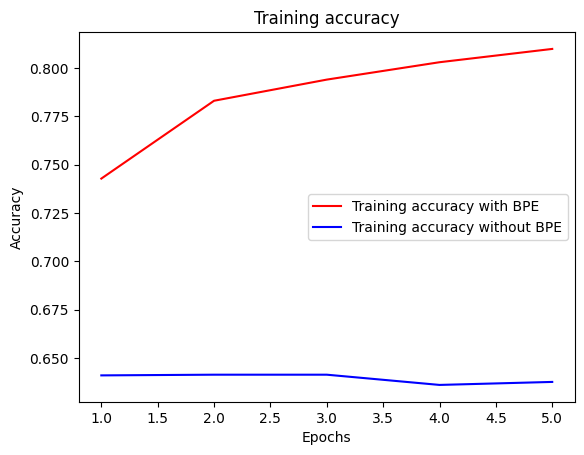

In [ ]:
import matplotlib.pyplot as plt

# Số lượng epochs
epochs = range(1, len(train_acc) + 1)

# Vẽ plot
plt.plot(epochs, train_acc, 'r', label='Training accuracy with BPE')
plt.plot(epochs, train_acc_withoutBPE, 'b', label='Training accuracy without BPE')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()



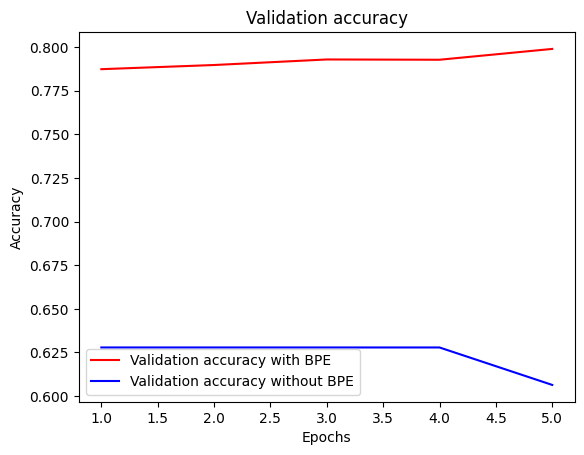

In [ ]:
plt.plot(epochs, val_acc, 'r', label='Validation accuracy with BPE')
plt.plot(epochs, val_acc_withoutBPE, 'b', label='Validation accuracy without BPE')
plt.title('Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

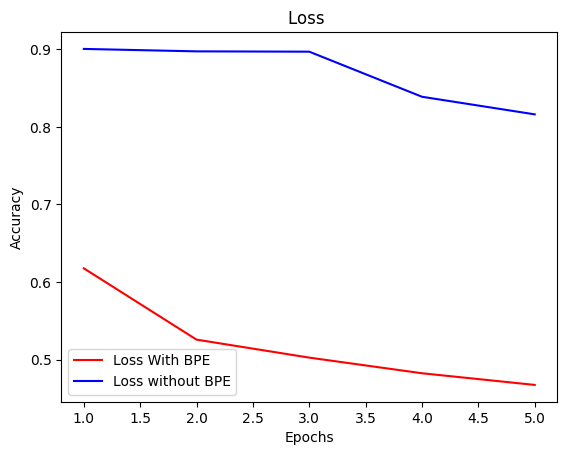

In [82]:
plt.plot(epochs,train_loss, 'r', label='Loss With BPE')
plt.plot(epochs, train_loss_withoutBPE, 'b', label='Loss without BPE')
plt.title('Loss ')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()